In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pandas import DataFrame
import itertools
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from math import sqrt
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

# Analysis imports
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import warnings
warnings.filterwarnings('ignore') #this would remove any deprecated warning


In [ ]:
df=pd.read_csv("Gold_data.csv")

In [ ]:
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [ ]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [ ]:
df.shape

(2182, 2)

In [ ]:
gold=df.set_index(pd.DatetimeIndex(df['date'])).drop("date",axis=1)

Text(0.5, 1.0, 'Date v/s Gold Price')

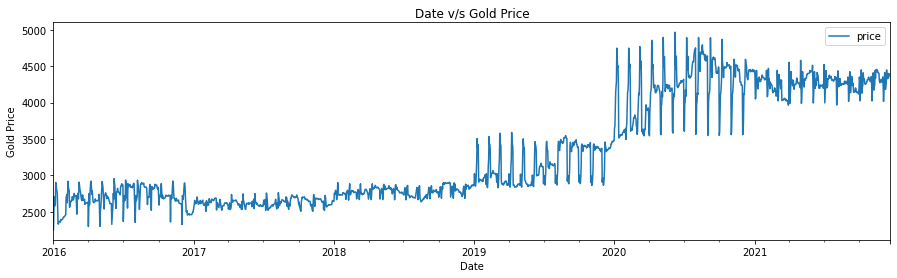

In [ ]:
gold.plot(figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Date v/s Gold Price")

Text(0.5, 1.0, 'Gold Price for year 2016')

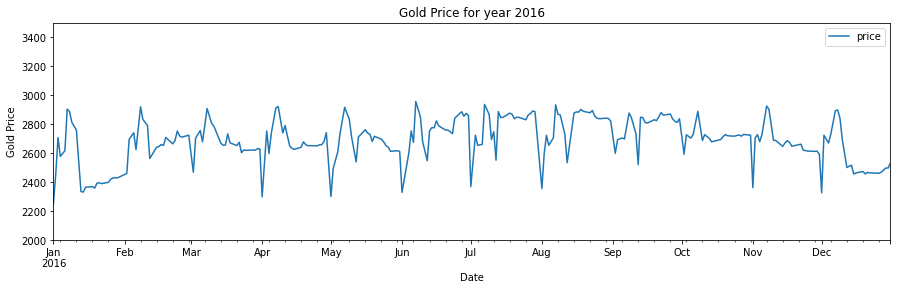

In [ ]:
gold.plot(xlim=['2016-01-01','2016-12-31'],ylim=[2000,3500],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for year 2016")

Text(0.5, 1.0, 'Gold Price for year 2017')

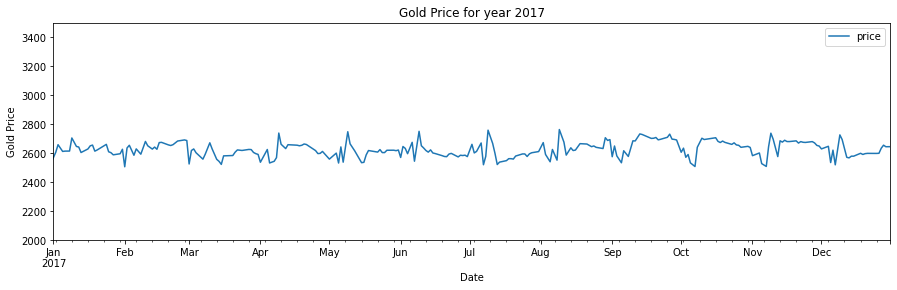

In [ ]:
gold.plot(xlim=['2017-01-01','2017-12-31'],ylim=[2000,3500],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for year 2017")

Text(0.5, 1.0, 'Gold Price for year 2018')

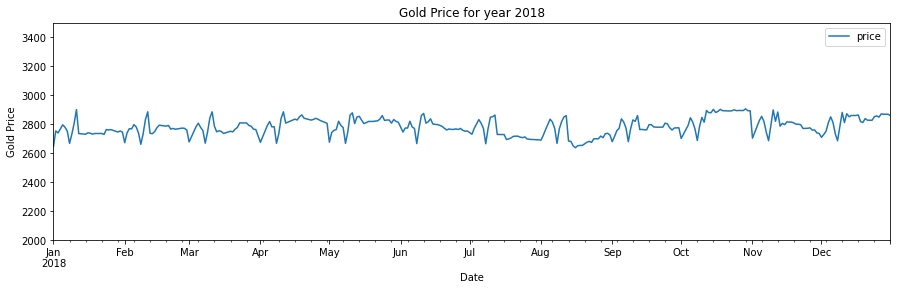

In [ ]:
gold.plot(xlim=['2018-01-01','2018-12-31'],ylim=[2000,3500],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for year 2018")

Text(0.5, 1.0, 'Gold Price for year 2019')

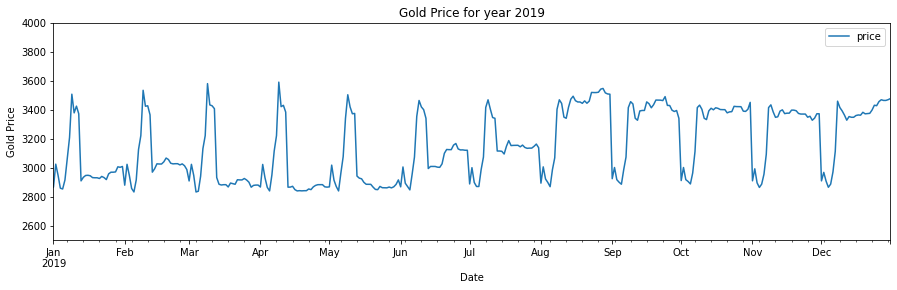

In [ ]:
gold.plot(xlim=['2019-01-01','2019-12-31'],ylim=[2500,4000],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for year 2019")

Text(0.5, 1.0, 'Gold Price for year 2020')

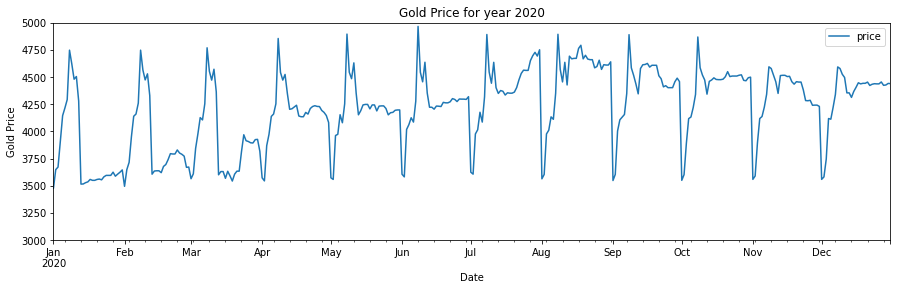

In [ ]:
gold.plot(xlim=['2020-01-01','2020-12-31'],ylim=[3000,5000],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for year 2020")

Text(0.5, 1.0, 'Gold Price for year 2021')

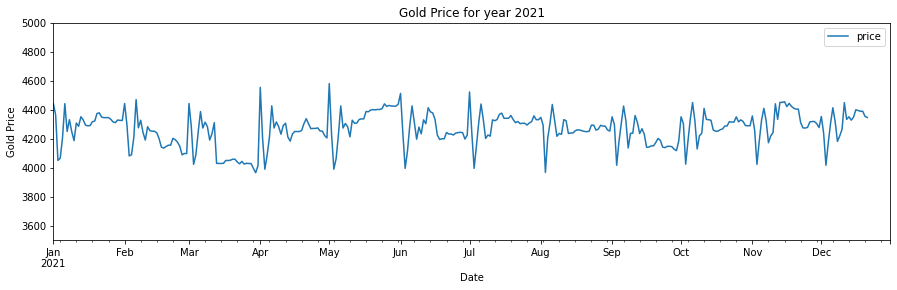

In [ ]:
gold.plot(xlim=['2021-01-01','2021-12-31'],ylim=[3500,5000],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for year 2021")

In [ ]:
df2=gold.resample("Y").mean()
df2.head()

,price
date,
2016-12-31,2690.614162
2017-12-31,2626.676484
2018-12-31,2781.938082
2019-12-31,3150.210685
2020-12-31,4216.378689


In [ ]:
df3=gold.resample("M").mean()
df3

,price
date,
2016-01-31,2495.832258
2016-02-29,2688.703448
2016-03-31,2682.854839
2016-04-30,2677.790000
2016-05-31,2677.650000
...,...
2021-08-31,4264.919355
2021-09-30,4207.506667
2021-10-31,4289.148387


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

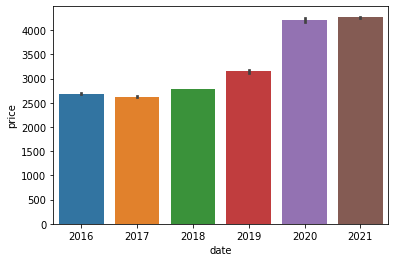

In [ ]:

sns.barplot(x= gold.index.year, y= gold.price)


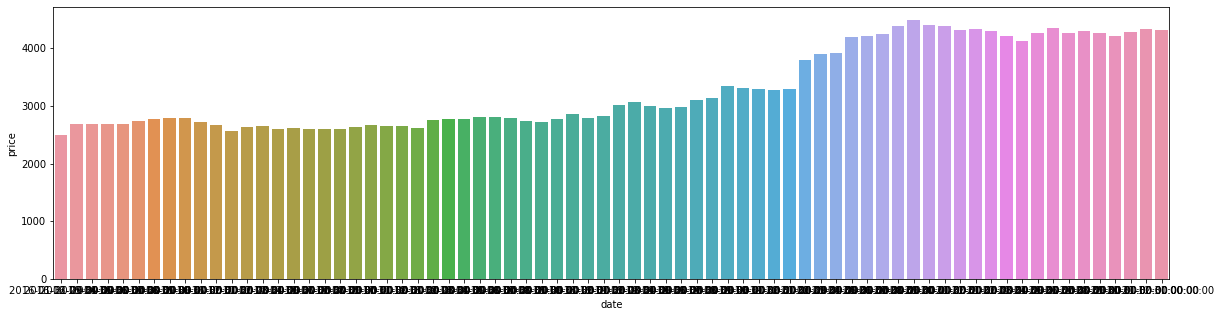

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x= df3.index, y= df3.price)

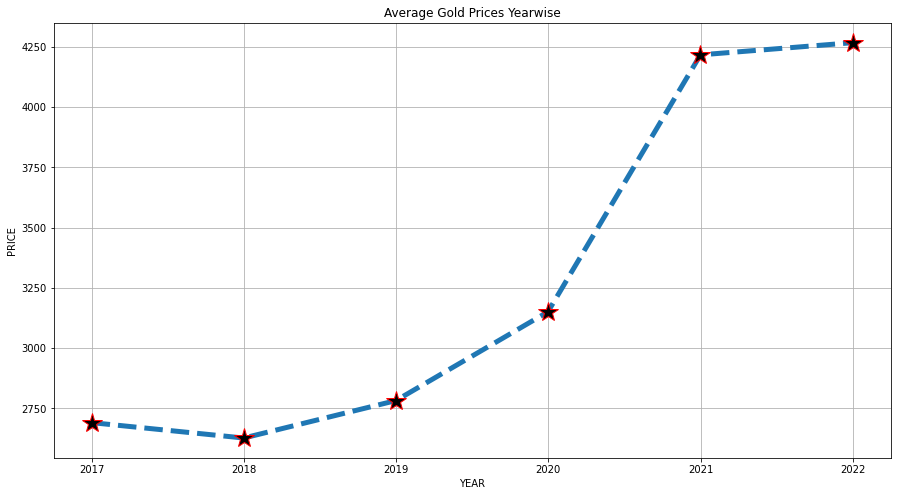

In [ ]:
y = df2['price']
x = df2.index

plt.figure(figsize=(15,8))
font1 = {'family':'sans serif','color':'black','size':30}
plt.title("Average Gold Prices Yearwise")
plt.xlabel("YEAR")
plt.ylabel("PRICE")

plt.plot(x,y,linestyle = 'dashed' ,linewidth = '5',marker = '*',ms = 20, mec = 'r', mfc = 'k')
plt.grid()
plt.show()

In [ ]:
gold_data_yearwise = gold.resample("Y").mean()
gold_data_yearwise

,price
date,
2016-12-31,2690.614162
2017-12-31,2626.676484
2018-12-31,2781.938082
2019-12-31,3150.210685
2020-12-31,4216.378689
2021-12-31,4266.871549


In [ ]:
gold_data_monthwise = gold.resample("M").mean()
gold_data_monthwise

,price
date,
2016-01-31,2495.832258
2016-02-29,2688.703448
2016-03-31,2682.854839
2016-04-30,2677.790000
2016-05-31,2677.650000
...,...
2021-08-31,4264.919355
2021-09-30,4207.506667
2021-10-31,4289.148387


In [ ]:
gold_data_quarter = gold.resample("3M").mean()
gold_data_quarter

,price
date,
2016-01-31,2495.832258
2016-04-30,2683.051111
2016-07-31,2734.153261
2016-10-31,2768.203261
2017-01-31,2620.771739
2017-04-30,2620.823034
2017-07-31,2604.250000
2017-10-31,2653.259783
2018-01-31,2669.412500


In [ ]:
gold_data_halfyear = gold.resample("6M").mean()
gold_data_halfyear

,price
date,
2016-01-31,2495.832258
2016-07-31,2708.882967
2017-01-31,2694.487500
2017-07-31,2612.399171
2018-01-31,2661.336141
2018-07-31,2777.994751
2019-01-31,2830.887772
2019-07-31,3040.154696
2020-01-31,3391.116848


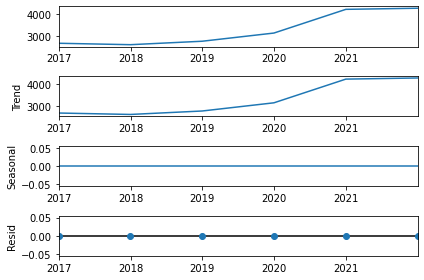

In [ ]:
result = seasonal_decompose(gold_data_yearwise, model='additive')
result.plot()
plt.show()

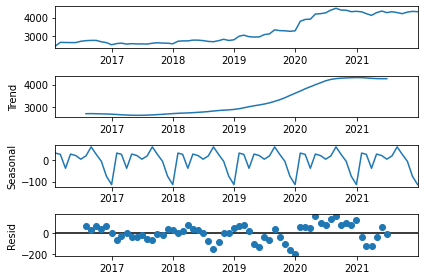

In [ ]:
result = seasonal_decompose(gold_data_monthwise, model='additive')
result.plot()
plt.show()

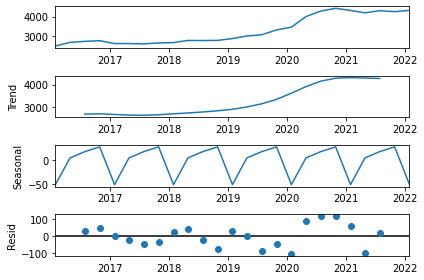

In [ ]:
result = seasonal_decompose(gold_data_quarter, model='additive')
result.plot()
plt.show()

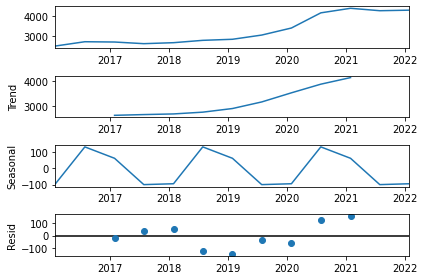

In [ ]:
result = seasonal_decompose(gold_data_halfyear, model='additive')
result.plot()
plt.show()

In [ ]:
adfuller_result = adfuller(gold['price'])
print('ADF Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])

ADF Statistic:  -0.30990365704573875
p-value:  0.9240899189086011


In [ ]:
data_diff = gold.diff().dropna()
diff_adfuller_result = adfuller(data_diff['price'])
print('Difference Method ADF Statistic: ', diff_adfuller_result[0])
print('Difference Method p-value: ', diff_adfuller_result[1])

Difference Method ADF Statistic:  -21.66454212724444
Difference Method p-value:  0.0


In [ ]:
data_difftwice = gold.diff().diff().dropna()
difftwice_adfuller_result = adfuller(data_difftwice['price'])
print('Difference Method ADF Statistic: ', difftwice_adfuller_result[0])
print('Difference Method p-value: ', difftwice_adfuller_result[1])

Difference Method ADF Statistic:  -16.299033158957716
Difference Method p-value:  3.2803943329227154e-29


In [ ]:
def difference(dataset, interval=1):
	diff = []
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

In [ ]:
dif30=difference(gold['price'],interval=30)

In [ ]:
diff30_adfuller_result = adfuller(dif30)
print('Difference Method ADF Statistic: ', diff30_adfuller_result[0])
print('Difference Method p-value: ', diff30_adfuller_result[1])

Difference Method ADF Statistic:  -10.01261574022718
Difference Method p-value:  1.7623278407657135e-17


In [ ]:
import numpy as np

In [ ]:
data_sqrt = np.sqrt(gold).dropna()
sqrt_adfuller_result = adfuller(data_sqrt['price'])
print('Square Root Method ADF Statistic: ', sqrt_adfuller_result[0])
print('Square Root Methodp-value: ', sqrt_adfuller_result[1])

Square Root Method ADF Statistic:  -0.3724189661915892
Square Root Methodp-value:  0.9146029735449441


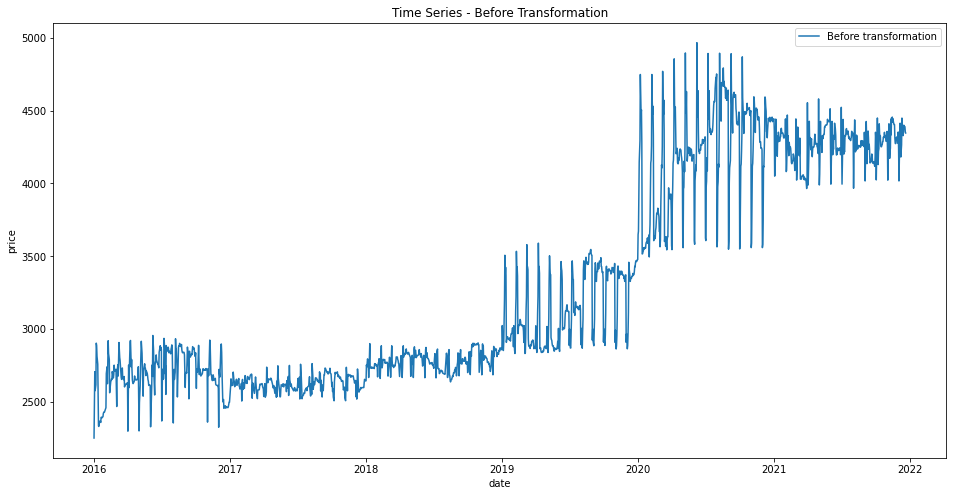

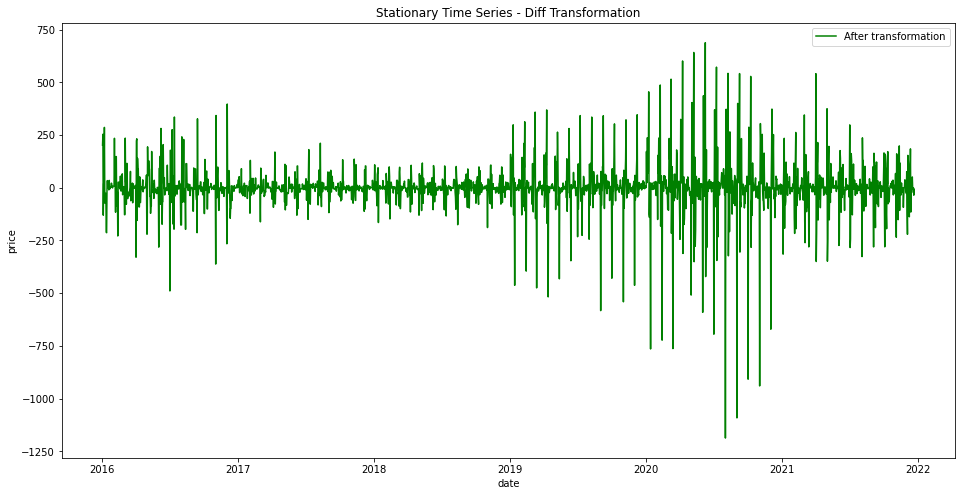

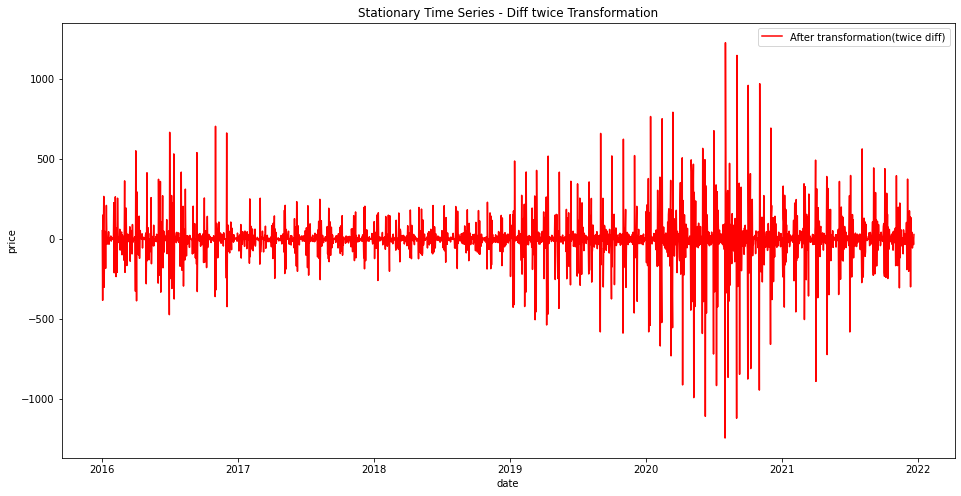

In [ ]:
# Plot the time series before transformation
plt.figure(figsize=(16,8))
sns.lineplot(x=gold.index, y='price', data=gold, linewidth=1.5, label='Before transformation').set_title('Time Series - Before Transformation')
plt.show()

# Plot the time series after transformation
plt.figure(figsize=(16,8))
sns.lineplot(x=data_diff.index, y='price', data=data_diff, label='After transformation', color='green').set_title('Stationary Time Series - Diff Transformation')
plt.show()

# Plot the time series after transformation (twice diff)
plt.figure(figsize=(16,8))
sns.lineplot(x=data_difftwice.index, y='price', data=data_difftwice, label='After transformation(twice diff)', color='red').set_title('Stationary Time Series - Diff twice Transformation')
plt.show()



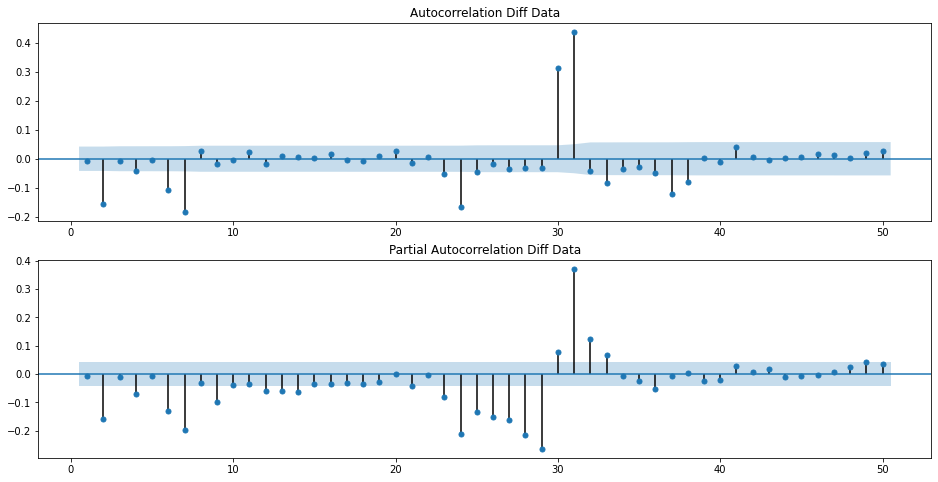

In [ ]:
# Plot ACF and PACF with stationary data using data that was differenced once

fig_diff, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))

# Plot ACF of data_diff
plot_acf(data_diff['price'], lags=50, zero=False, ax=ax1, title='Autocorrelation Diff Data')

# Plot PACF of data_diff
plot_pacf(data_diff['price'], lags=50, zero=False, ax=ax2, title='Partial Autocorrelation Diff Data')

plt.show()

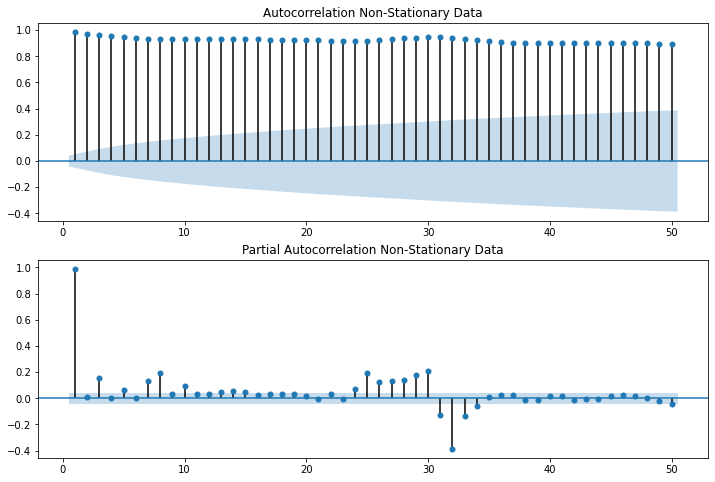

In [ ]:
# Plot ACF and PACF with non-stationary data just to see how different they are compared to the stationary data

fig_data_gld, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF of data_difftwice
plot_acf(gold['price'], lags=50, zero=False, ax=ax1, title='Autocorrelation Non-Stationary Data')

# Plot PACF of data_difftwice
plot_pacf(gold['price'], lags=50, zero=False, ax=ax2, title='Partial Autocorrelation Non-Stationary Data')

plt.show()

In [ ]:
gold['diff30']=gold['price']-gold['price'].shift(30)

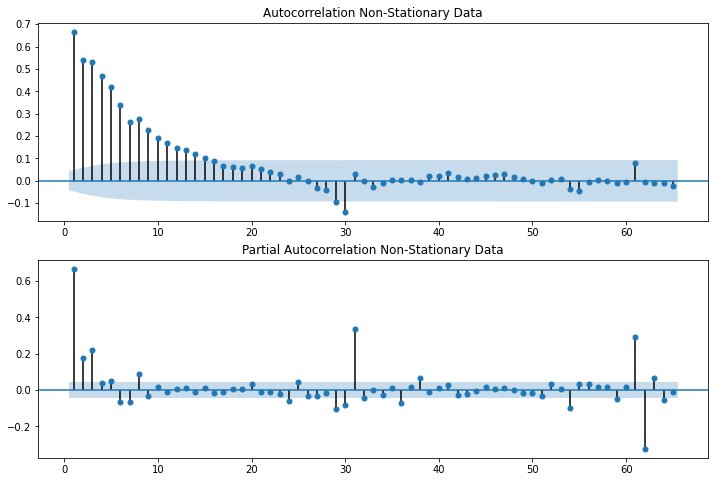

In [ ]:
# Plot ACF and PACF with month diff stationary data just to see how different they are compared to the stationary data

fig_data_gld, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF of data_difftwice
plot_acf(gold['diff30'].dropna(), lags=65, zero=False, ax=ax1, title='Autocorrelation Non-Stationary Data')

# Plot PACF of data_difftwice
plot_pacf(gold['diff30'].dropna(), lags=65, zero=False, ax=ax2, title='Partial Autocorrelation Non-Stationary Data')

plt.show()

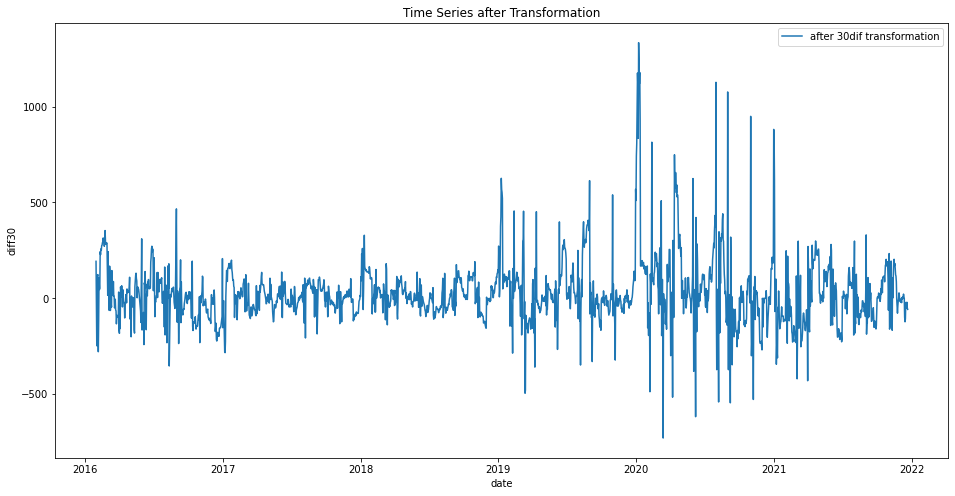

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=gold.index, y='diff30', data=gold, linewidth=1.5, label='after 30dif transformation').set_title('Time Series after Transformation')
plt.show()

In [ ]:
diffm_adfuller_result = adfuller(gold['diff30'].dropna())
print('Difference Method ADF Statistic: ', diffm_adfuller_result[0])
print('Difference Method p-value: ', diffm_adfuller_result[1])

Difference Method ADF Statistic:  -10.01261574022718
Difference Method p-value:  1.7623278407657135e-17


In [ ]:
gold

,price,diff30
date,,
2016-01-01,2252.60,NaN
2016-01-02,2454.50,NaN
2016-01-03,2708.10,NaN
2016-01-04,2577.80,NaN
2016-01-05,2597.75,NaN
...,...,...
2021-12-17,4394.40,-49.4
2021-12-18,4389.50,-33.8
2021-12-19,4389.50,-20.6


In [ ]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2020,12,1)
test_dataset_end=datetime(2021,12,21)

In [ ]:
train_data=gold[:train_dataset_end]
test_data=gold[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
test_data

,price,diff30
date,,
2020-12-02,3582.1,-8.6
2020-12-03,3745.9,-149.0
2020-12-04,4119.0,0.0
2020-12-05,4113.1,-24.7
2020-12-06,4222.5,-2.0
...,...,...
2021-12-17,4394.4,-49.4
2021-12-18,4389.5,-33.8
2021-12-19,4389.5,-20.6


In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]